# Sampling


## Impulse Train

The representation of signals through equidistant, quantized 
values is the fundamental principle of digital sound processing
and has an influence on several aspects of sound synthesis.
Mathematically, a continuous signal $x(t)$ is sampled by a multiplication with an
impulse train $\delta_T(t)$ (also referred to as Dirac comb) of infitite length:
 

$x[n] = x(t) \delta_T (t) = \sum\limits_{n=-\infty}^{\infty} x(n T) \delta (t-nT)$

This impulse train can be expressed as a Fourier series:

$\delta_T = \frac{1}{T} \left[1 +2 \cos(\omega_s t) 2 \cos(2 \omega_s t) + \cdots \right]$,  with $\omega_s=\frac{2\pi}{T}$

$\delta_T = \frac{1}{T}  + \sum \left( \frac{2}{T} \cos(n \omega_s t) \right)$ 

## Fourier Transform of the Impulse Train

The Fourier transform of a time-domain impulse train is 
a frequency-domain impulse train:

$\mathfrak{F}(\delta_T) = \mathfrak{F}(\sum C_k e^{j k \omega_0 t})$


$\mathfrak{F}(\delta_T) = \sum\limits_{m = -\infty}^{\infty} \delta(T f)$


## Fourier Transform of the Sampled Signal

The Fourier transform of the sampled signal is periodic:


$X[i] = \frac{1}{T}  + \sum\limits_{n=-\infty}^{\infty}   X(\omega -n \omega_s)$








# Aliasing

Since the spectrum of a sampled signal is periodic,
it must be band-limited, in order to avoid misinterpretations,
known as aliasing. Since the spectrum is periodic with $\omega_s$,
the maximum frequency which can be represented - the Nyquist frequency -
is:
 

$f_N = \frac{f_s}{2}$

As soon as components of a digitally sampled signal exceed this boundary,
aliases occur.
The following example can be used to set the frequency of a sine wave beyond the Nyquist frequency, resulting in aliasing and ambiguity, visualized in the time domain.
The static version of the following example shows the time-domain signal 
of a $900 \ \mathrm{Hz}$ sinusoid at a sampling rate $f_s = 1000 \ \mathrm{Hz}$:


<IPython.core.display.Javascript object>


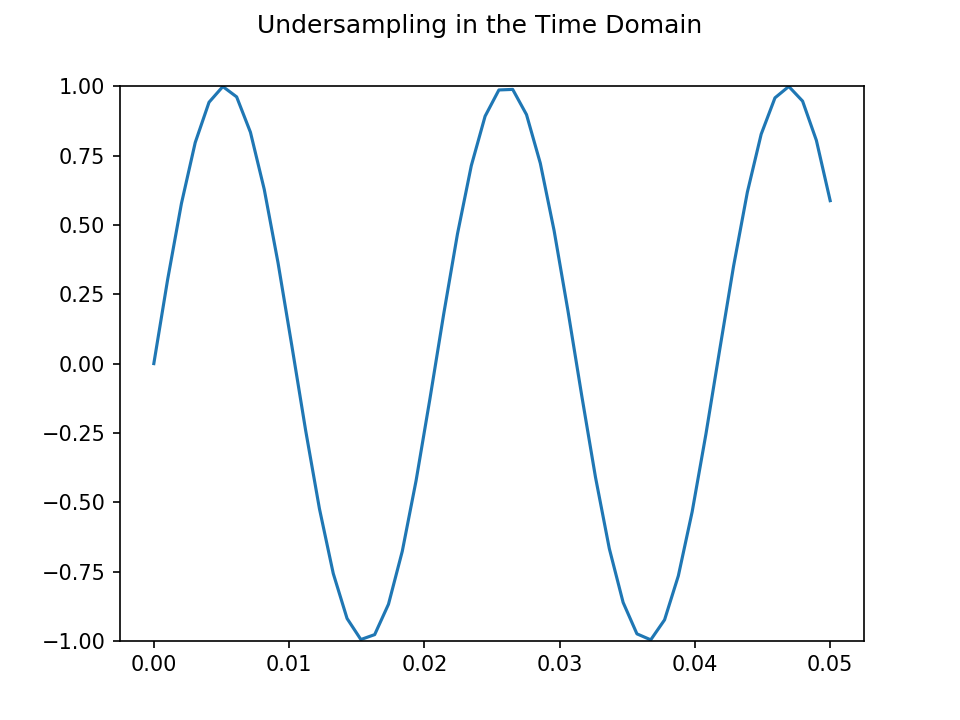

interactive(children=(IntSlider(value=900, description='f', max=1500), Output()), _dom_classes=('widget-intera…

In [404]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from scipy import signal
from IPython.display import display, Markdown, clear_output
import IPython.display as ipd

from ipywidgets import *

# 1000 Hz sampling rate
fs = 1000

# time vector with N samples length
N  = 50
t  = np.linspace(0,N/fs,N)

f = 900

x  = np.sin(2*np.pi*f*t)

 
fig = plt.figure()
fig.suptitle("Undersampling in the Time Domain")

ax = fig.add_subplot(1, 1, 1)
ax.set_ylim(-1, 1)
    
line1, = ax.plot(t, x)
 

def update(f = widgets.IntSlider(min = 0, max= 1500, step=1, value=900)):
    
    x  = np.sin(2*np.pi*f*t)

    line1.set_ydata(x)
         
    fig.canvas.draw_idle()

interact(update);

 

# Aliasing Frequency for a Sinusoid


For pure sinusoids, aliasing results in a sinusoid 
at the mirror- or folding frequency $f_m$:

$f_m = \Big| f -  f_s \Big\lfloor \frac{f}{f_s} \Big\rfloor \Big|$ 

With $\lfloor x \rfloor$ as round to next integer.

At a sampling rate $f_s = 1000 \ \mathrm{Hz}$ and a Nyquist frequency 
$f_N = 500 \ \mathrm{Hz}$, a sinusoid with $f = 900 \ \mathrm{Hz}$
will be interpreted as one with $f = 100 \ \mathrm{Hz}$:

In [405]:
fs = 1000
f  = 900
 
f_m =  abs(f - fs*round(f/fs)) 

print("f_m = "+str(f_m))


f_m = 100


The following example can be used interactively as a Jupyter notebook,
by changing the frequency of a sinusoid and listening to the aliased
output. When sweeping the range up to $2500 \ \mathrm{Hz}$, the 
resulting output will increase and decrease in frequency.
In the static version, a sinusoid of $f = 900 \ \mathrm{Hz}$
is used, resulting in an audible output at $f_m = 100 \ \mathrm{Hz}$:

<IPython.core.display.Javascript object>


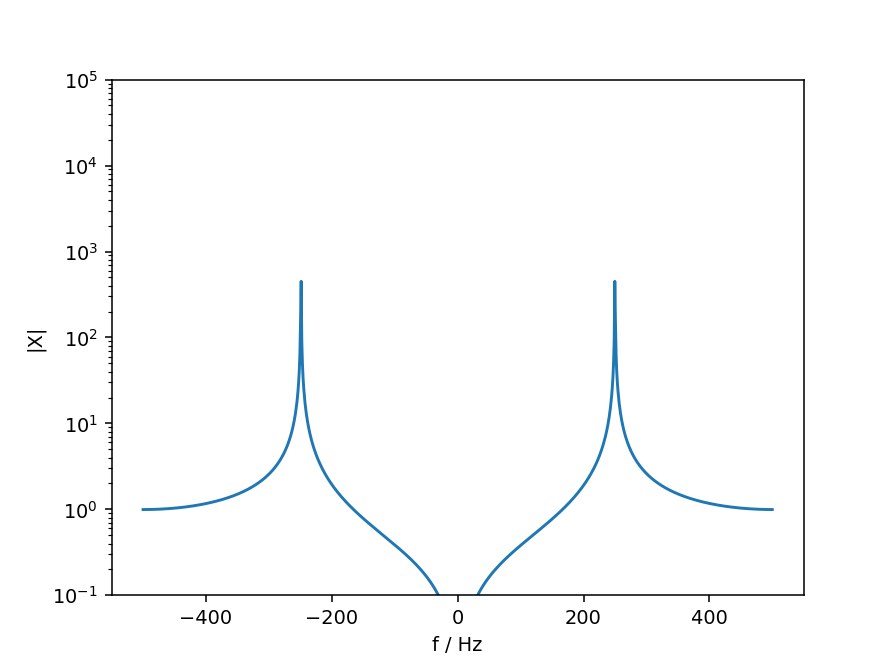

interactive(children=(IntSlider(value=900, description='f', max=2500), Output()), _dom_classes=('widget-intera…

In [407]:
fs = 1000

# time vector with N samples length
N  = fs
t  = np.linspace(0,N/fs,N)

t  = np.linspace(0,1,N)

f  = 900
x  = np.sin(2*np.pi*f*t)


X = abs(np.fft.fft(x))
X = np.fft.fftshift(X)
f = np.linspace(-fs/2,fs/2,len(X))



 
ipd.display(ipd.Audio(x, rate=fs))


fig = plt.figure()
ax  = fig.add_subplot(1, 1, 1)
ax.set_yscale('log') 
ax.set_ylim(10e-2,10e4) 

line, = ax.plot(f,X);
plt.xlabel('f / Hz')
plt.ylabel('|X|');
 
    
    
def update(f = widgets.IntSlider(min = 0, max= 2500, step=1, value=900)):
    
     
    x = np.sin(2*np.pi*f*t)    
     
        
    X = abs(np.fft.fft(x))
    X = np.fft.fftshift(X)
    
    line.set_ydata(X)
   
    ipd.display(ipd.Audio(x, rate=fs))
    fig.canvas.draw_idle()
    
    
        
interact(update);


# Aliasing for Signals with Overtones

For signals with overtones, undersampling leads to inharmonic 
alisases and happen before the fundamental itself exceeds
the Nyquist frequency.
For a harmonic signal with a fundamental frequeny $f_0$,
the alias frequencies for all $N$ harmonics can be calculated:

$f_m = \sum\limits_{n=1}^{N} \Big| n f_0 -  f_s \Big\lfloor \frac{n f_0}{f_s} \Big\rfloor \Big|$

For certain fundamental frequencies, all aliases will be located at actual 
multiples of the fundamental, resulting in a correct synthesis despite aliasing.
The following example uses a sampling rate $f_s = 16000 \ \mathrm{Hz}$,
with an adjustable $f_0$ for the use as a Jupyter notebook.
In the static HTML version, a square wave of $f_0 = 277 \ \mathrm{Hz}$
is used and the result with aliasing artefacts can be heard.
The plot shows the additional content caused by the mirror frequencies:


<IPython.core.display.Javascript object>


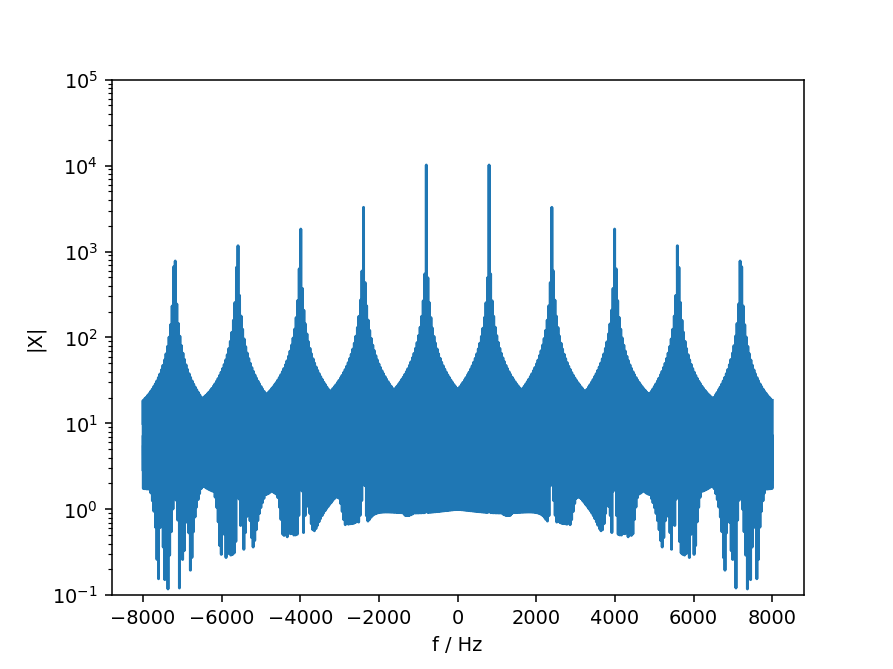

interactive(children=(IntSlider(value=277, description='f', max=2500), Output()), _dom_classes=('widget-intera…

In [408]:
fs = 16000

# time vector with N samples length
N  = fs
t  = np.linspace(0,N/fs,N)

t  = np.linspace(0,1,N)

f  = 277
x  = signal.square(2*np.pi*f*t)


X = abs(np.fft.fft(x))
X = np.fft.fftshift(X)
f = np.linspace(-fs/2,fs/2,len(X))



 
ipd.display(ipd.Audio(x, rate=fs))


fig = plt.figure()
ax  = fig.add_subplot(1, 1, 1)
ax.set_yscale('log') 
ax.set_ylim(10e-2,10e4) 

line, = ax.plot(f,X);
plt.xlabel('f / Hz')
plt.ylabel('|X|');
#ax.set_xlim(-1000, 1000) 
 
 
    
    
def update(f = widgets.IntSlider(min = 0, max= 2500, step=1, value=277)):
         
    x = signal.square(2*np.pi*f*t)    
     
        
    X = abs(np.fft.fft(x))
    X = np.fft.fftshift(X)
    
    line.set_ydata(X)
   
    ipd.display(ipd.Audio(x, rate=fs))
    fig.canvas.draw_idle()
    
    
        
interact(update);


# Anti-Aliasing Filter

In analog-to-digital conversion, simple anti-aliasing filters can be used 
to band-limit the input and discard signal components above the Nyquist frequency.
In case of digital synthesis, however, this principle can not 
be applied. When generating a square wave signal with an infinite 
number of harmonics, aliasing happens instantaneoulsy and can not be 
removed, afterwards.

The following example illustrates this, by using a 5th order Butterworth 
filter with a cutoff frequency of $f_c = 0.95 \frac{f_s}{2}$. Although the output 
signal is band-limited, the aliasing artifacts are still contained 
in the output signal.


<IPython.core.display.Javascript object>


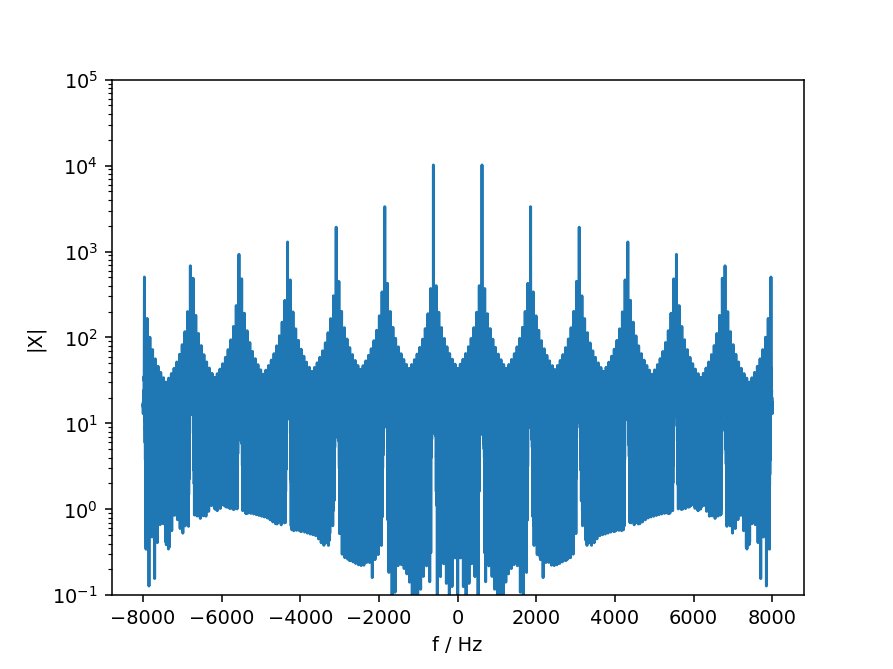

interactive(children=(IntSlider(value=177, description='f', max=2500), Output()), _dom_classes=('widget-intera…

In [409]:
fs = 16000

# get coefficients for an anti aliasing filter
order = 5
b, a  = signal.butter(order, 0.95, btype='low', analog=False)

# time vector with N samples length
N  = fs
t  = np.linspace(0,N/fs,N)

t  = np.linspace(0,1,N)


f  = 177
x  = signal.square(2*np.pi*f*t)

# apply anti alisaing filter
x = signal.lfilter(b, a, x)

X = abs(np.fft.fft(x))
X = np.fft.fftshift(X)
f = np.linspace(-fs/2,fs/2,len(X))
 
ipd.display(ipd.Audio(x, rate=fs))

fig = plt.figure()
ax  = fig.add_subplot(1, 1, 1)
ax.set_yscale('log') 
ax.set_ylim(10e-2,10e4) 

line, = ax.plot(f,X);
plt.xlabel('f / Hz')
plt.ylabel('|X|');
#ax.set_xlim(-10000, 10000) 
    
    
def update(f = widgets.IntSlider(min = 0, max= 2500, step=1, value=177)):
         
    x = signal.square(2*np.pi*f*t)    
    
    # apply anti alisaing filter
    #x = signal.lfilter(b, a, x)
        
    X = abs(np.fft.fft(x))
    X = np.fft.fftshift(X)
    
    line.set_ydata(X)
   
    ipd.display(ipd.Audio(x, rate=fs))
    fig.canvas.draw_idle()
    
    
        
interact(update);


# Band Limited Square Wave

In order to avoid the aliasing, band-limited signals can be used.
The following example makes use of a Fourier series for generating
a square wave signal. Partials exceeding the Nyquist frequency can thus be 
excluded from synthesis. 
The static HTML version uses a square wave with $f_0 = 177 \ \mathrm{Hz}$.
Used in Jupyter, the frequency can be adjusted:



<IPython.core.display.Javascript object>


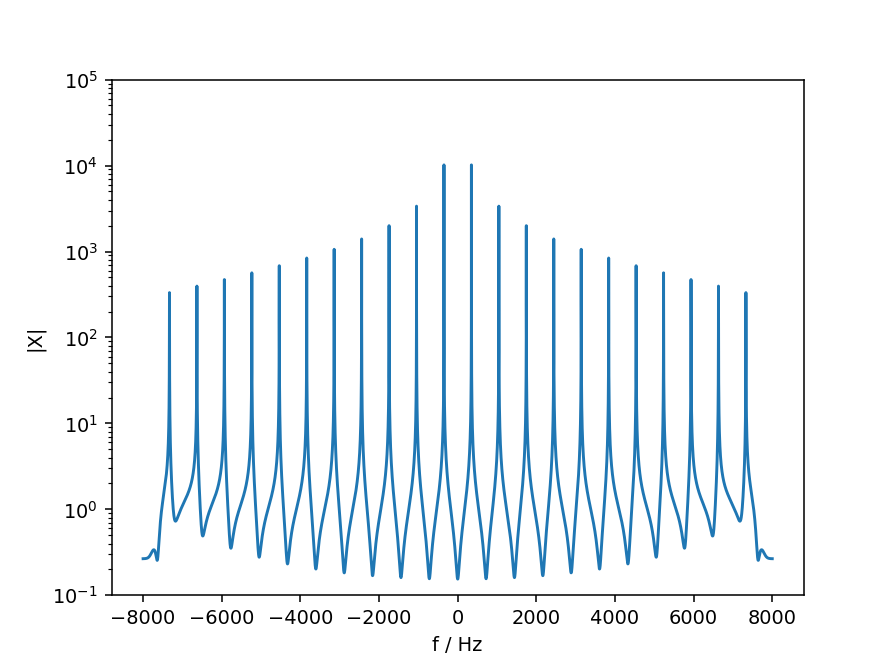

interactive(children=(IntSlider(value=177, description='f', max=2500), Output()), _dom_classes=('widget-intera…

In [412]:
fs = 16000

def square(t,f0, fs, nPartials):

    y = np.zeros(len(t))
    
    for partCNT in range(nPartials):

        if partCNT*f0 < fs/4:
            y += (4/np.pi) * (np.sin(2*np.pi* f0 * (2* partCNT +1) *t)/(2*partCNT+1))
            
    
    
    return y

# time vector with N samples length
N  = fs
t  = np.linspace(0,N/fs,N)

t  = np.linspace(0,1,N)

f  = 177
nPartials = 100
x  = square(t, f, fs, nPartials)




X = abs(np.fft.fft(x))
X = np.fft.fftshift(X)
f = np.linspace(-fs/2,fs/2,len(X))


 
ipd.display(ipd.Audio(x, rate=fs))


fig = plt.figure()

# use for testing the square wave in time domain
#ax1  = fig.add_subplot(2, 1, 1)
#ax1.plot(x[0:1000]) 

ax  = fig.add_subplot(1, 1, 1)
ax.set_yscale('log') 
ax.set_ylim(10e-2,10e4) 

line, = ax.plot(f,X);
plt.xlabel('f / Hz');
plt.ylabel('|X|');
#ax.set_xlim(-10000, 10000) 


    
    
def update(f = widgets.IntSlider(min = 0, max= 2500, step=1, value=177)):
         
    x  = square(t, f, fs, nPartials)
    
    # apply anti alisaing filter
    x = signal.lfilter(b, a, x)
        
    X = abs(np.fft.fft(x))
    X = np.fft.fftshift(X)
    
    line.set_ydata(X)
   
    ipd.display(ipd.Audio(x, rate=fs))
    fig.canvas.draw_idle();
    
    
        
interact(update);
